In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('statcast_data/2023.csv')

In [3]:
df['pfx_x_adj'] = np.where(df['p_throws']=='L', -df['pfx_x'], df['pfx_x'])

In [7]:
cols = ['release_speed', 'pfx_x_adj', 'pfx_z']

In [8]:
df = df.dropna(subset=cols)

In [9]:
tsne = TSNE(verbose=1)
embedding = tsne.fit_transform(df[cols])


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 657883 samples in 1.044s...
[t-SNE] Computed neighbors for 657883 samples in 24.472s...
[t-SNE] Computed conditional probabilities for sample 1000 / 657883
[t-SNE] Computed conditional probabilities for sample 2000 / 657883
[t-SNE] Computed conditional probabilities for sample 3000 / 657883
[t-SNE] Computed conditional probabilities for sample 4000 / 657883
[t-SNE] Computed conditional probabilities for sample 5000 / 657883
[t-SNE] Computed conditional probabilities for sample 6000 / 657883
[t-SNE] Computed conditional probabilities for sample 7000 / 657883
[t-SNE] Computed conditional probabilities for sample 8000 / 657883
[t-SNE] Computed conditional probabilities for sample 9000 / 657883
[t-SNE] Computed conditional probabilities for sample 10000 / 657883
[t-SNE] Computed conditional probabilities for sample 11000 / 657883
[t-SNE] Computed conditional probabilities for sample 12000 / 657883
[t-SNE] Computed conditional probab

In [10]:
df['pitch_tsne_x'] = embedding[:,0]
df['pitch_tsne_y'] = embedding[:,1]

Text(0.5, 1.0, 'TSNE projection of pitch types')

c:\Users\wampl\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\wampl\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


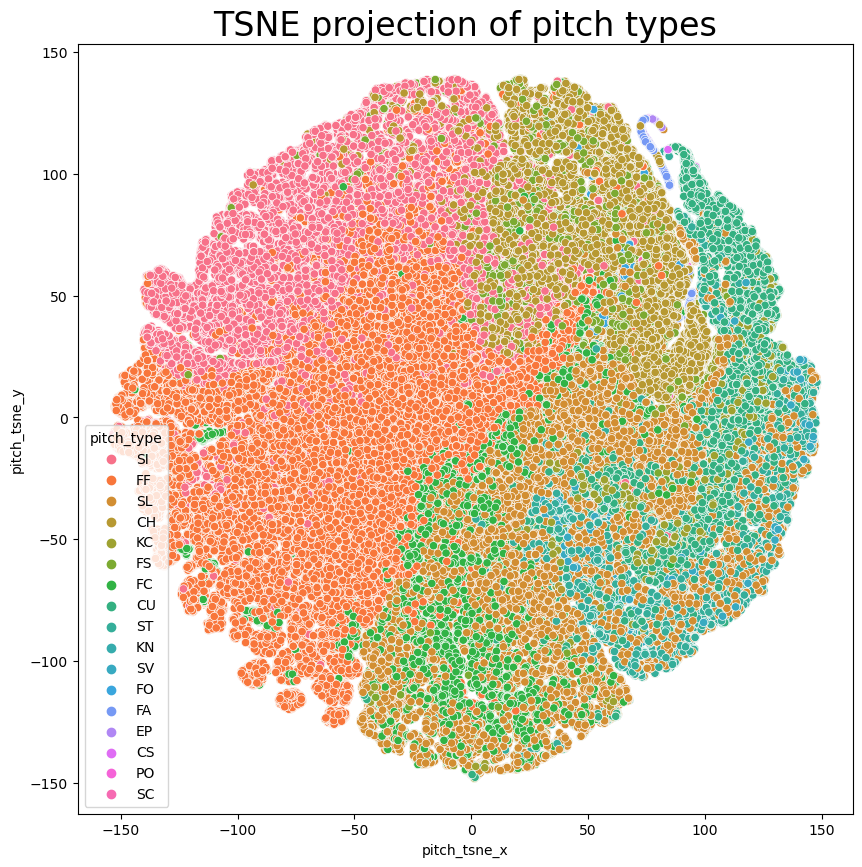

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='pitch_tsne_x', y='pitch_tsne_y', hue='pitch_type', data=df)
plt.title('TSNE projection of pitch types', fontsize=24)

In [13]:
umap_model = umap.UMAP(verbose=True)
embedding_umap = umap_model.fit_transform(df[cols])

UMAP( verbose=True)
Wed Sep 27 15:57:41 2023 Construct fuzzy simplicial set
Wed Sep 27 15:57:41 2023 Finding Nearest Neighbors
Wed Sep 27 15:57:41 2023 Building RP forest with 46 trees
Wed Sep 27 15:57:48 2023 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	Stopping threshold met -- exiting after 2 iterations
Wed Sep 27 15:58:10 2023 Finished Nearest Neighbor Search
Wed Sep 27 15:58:16 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Sep 27 17:34:46 2023 Finished embedding


In [14]:
df['pitch_umap_x'] = embedding_umap[:,0]
df['pitch_umap_y'] = embedding_umap[:,1]

Text(0.5, 1.0, 'UMAP projection of pitch types')

c:\Users\wampl\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\wampl\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


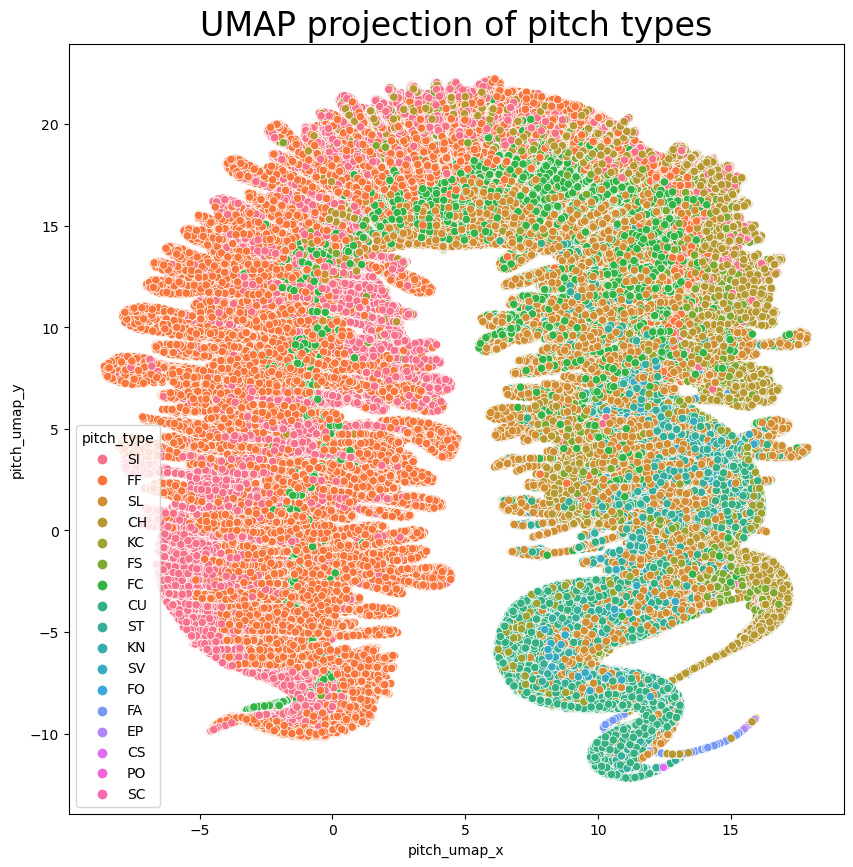

In [16]:

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='pitch_umap_x', y='pitch_umap_y', hue='pitch_type', data=df)
plt.title('UMAP projection of pitch types', fontsize=24)


c:\Users\wampl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'TSNE projection of pitch types with KMeans Clustering')

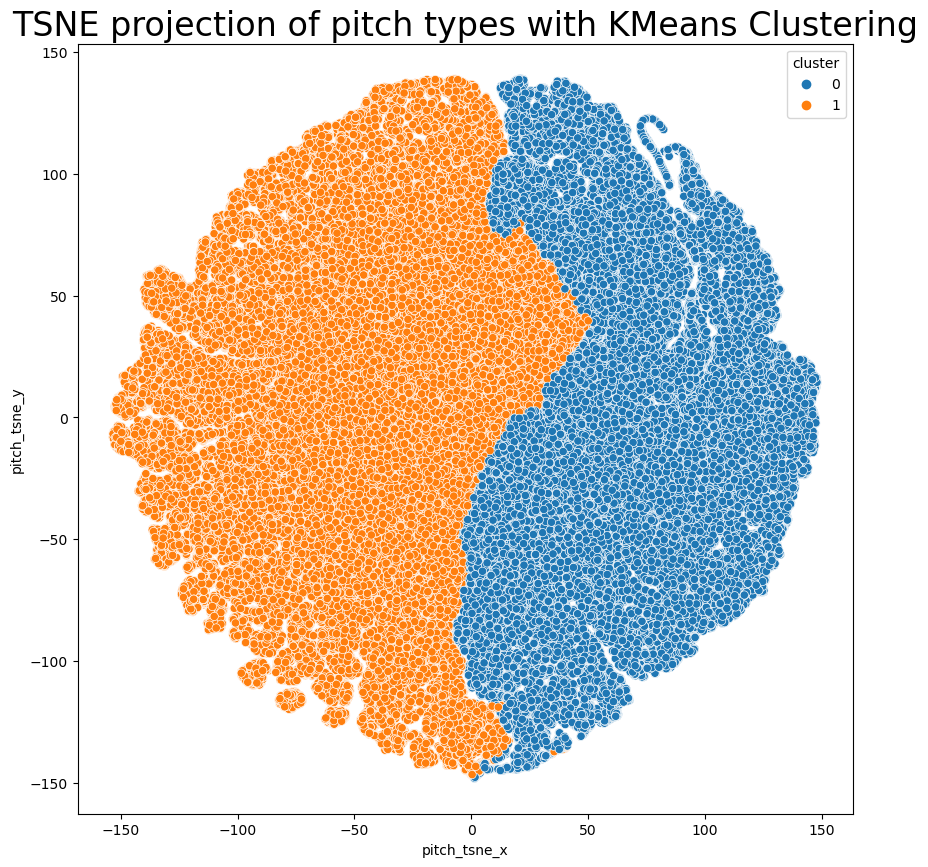

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(df[['release_speed', 'pfx_x_adj', 'pfx_z']])
df['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='pitch_tsne_x', y='pitch_tsne_y', hue='cluster', data=df)
plt.title('TSNE projection of pitch types with KMeans Clustering', fontsize=24)


In [25]:
print(df.groupby('cluster')['pitch_type'].value_counts())


cluster  pitch_type
0        SL             98064
         CH             55995
         CU             47635
         ST             28167
         FC             21262
         KC             11064
         FS             10188
         SI              4646
         FF              2681
         SV              2191
         FA              1033
         FO               734
         EP               507
         KN               139
         SC                74
         CS                41
         PO                 9
1        FF            208963
         SI             96213
         FC             29364
         SL             18934
         CH             15344
         FS              4114
         KC               205
         CU               155
         ST               127
         PO                31
         FA                 3
Name: count, dtype: int64


In [26]:
df.groupby(['cluster','pitch_type'])['release_speed'].mean().round()

cluster  pitch_type
0        CH            84.0
         CS            63.0
         CU            79.0
         EP            48.0
         FA            67.0
         FC            86.0
         FF            87.0
         FO            83.0
         FS            85.0
         KC            81.0
         KN            75.0
         PO            86.0
         SC            80.0
         SI            87.0
         SL            84.0
         ST            82.0
         SV            82.0
1        CH            90.0
         CU            89.0
         FA            89.0
         FC            91.0
         FF            94.0
         FS            90.0
         KC            89.0
         PO            91.0
         SI            94.0
         SL            90.0
         ST            89.0
Name: release_speed, dtype: float64

In [23]:
df.columns

Index(['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
